In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 



In [2]:
(x_train, y_train),(x_test, y_test)= fashion_mnist.load_data() 


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [3]:
## Scale the data between 0 and 1 
x_train = x_train / 255.0 
x_test = x_test / 255.0 


In [4]:
### Flatten the images 
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


In [5]:
### Now build the sequential model i.e feed forward neural network.
model = Sequential([
     Dense(256,activation='relu', input_shape=(784,)),
     Dense(128, activation='relu'),
     Dense(64, activation='relu'),
     Dense(10,activation='softmax')
])

c:\Users\adity\.conda\envs\genai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    x_train,y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7768 - loss: 0.6155 - val_accuracy: 0.8479 - val_loss: 0.4147
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8658 - loss: 0.3672 - val_accuracy: 0.8626 - val_loss: 0.3863
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8778 - loss: 0.3300 - val_accuracy: 0.8694 - val_loss: 0.3651
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8849 - loss: 0.3126 - val_accuracy: 0.8574 - val_loss: 0.3896
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8902 - loss: 0.2880 - val_accuracy: 0.8754 - val_loss: 0.3533
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8985 - loss: 0.2739 - val_accuracy: 0.8755 - val_loss: 0.3404
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9027 - loss: 0.2577 - val_accuracy: 0.8784 - val_loss: 0.3383
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9074 - loss: 0.2477

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.3811
Test Accuracy: 0.8899999856948853
Test Loss: 0.3770301938056946


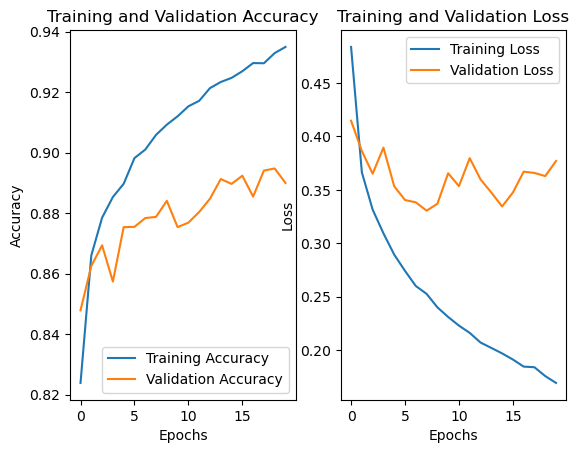

In [10]:
plt.Figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')   
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.show()
